In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("train.csv")
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df = df.replace({'yes': 1, 'no': 0, '?': 'Others', 'others': 'Others'})

In [ ]:
plt.pie(df['Class/ASD'].value_counts(),
         labels=df['Class/ASD'].value_counts().index,
         startangle=90,
         counterclock=False,
        autopct='%1.1f%%')

plt.show()

In [ ]:
ints = df.select_dtypes(include=int).columns.tolist()
floats = df.select_dtypes(include=float).columns.tolist()
objects_ = df.select_dtypes(include='object').columns.tolist()

In [ ]:
# ints.remove('ID')
# ints.remove('Class/ASD')
df_melted.head()

In [ ]:
df_melted = df.melt(id_vars=['ID', 'Class/ASD'], value_vars=ints, var_name='col', value_name='value')

plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
    plt.subplot(5,3,i+1)
    sns.countplot(x='value', hue='Class/ASD', data=df_melted[df_melted['col']==col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
plt.subplots(figsize=(15,15))

for i, col in enumerate(objects_):
    plt.subplot(5, 3, i + 1)
    sns.countplot(x=col, hue='Class/ASD', data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()

In [ ]:
plt.subplots(figsize=(15, 5))

for i, col in enumerate(floats):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col])

plt.tight_layout()
plt.show()

In [ ]:
df = df[df['result']>-5]
df.shape

In [ ]:
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'
    
df['ageGroup'] = df['age'].apply(convertAge)

In [ ]:
sns.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

In [ ]:
def add_feature(data):

    data['sum_score'] = 0
    for col in data.loc[:, 'A1_Score': 'A10_Score'].columns:
        data['sum_score'] += data[col]

    data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']
    return data

df = add_feature(df)

In [ ]:
sns.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

In [ ]:
df['age'] = df['age'].apply(lambda x: np.log(x))
sns.distplot(df['age'])
plt.show()

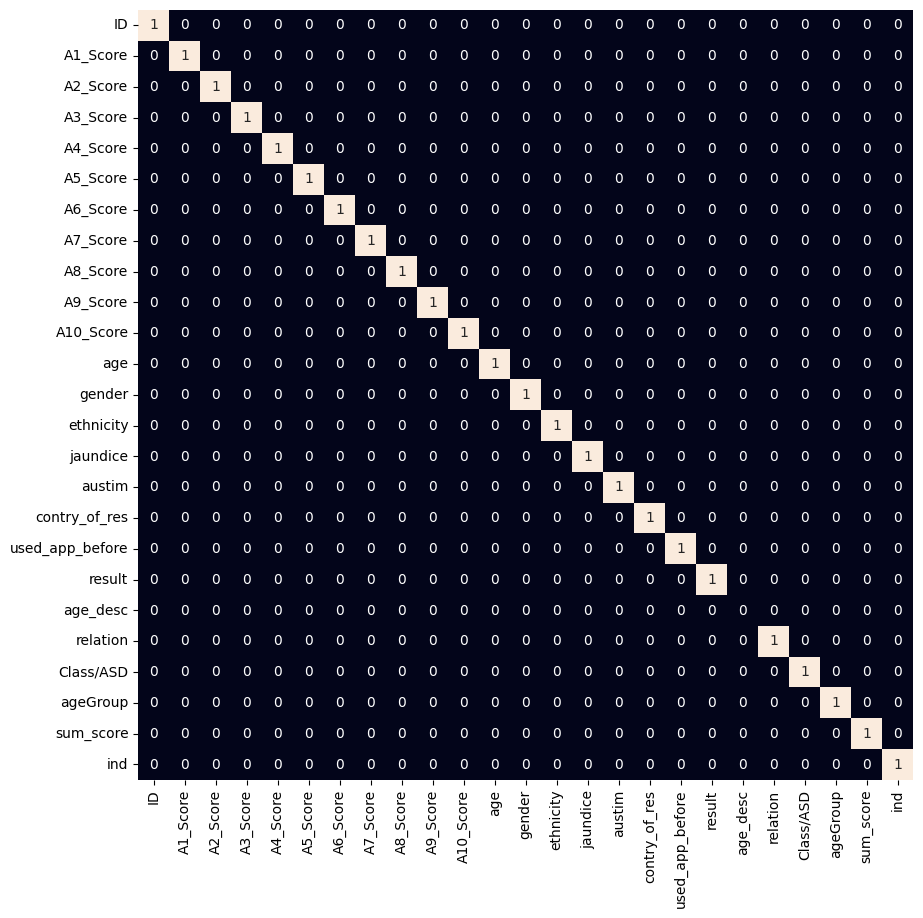

In [76]:
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
    return data

df = encode_labels(df)

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [77]:
features = df.drop(['ID', 'age_desc', 'used_app_before', 'austim', 'Class/ASD'], axis=1)
target = df['Class/ASD']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X, Y = ros.fit_resample(x_train, y_train)

print (X.shape, Y.shape)

(1026, 20) (1026,)


In [79]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
x_test = scaler.transform(x_test)

In [82]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
    model.fit(X, Y)
    print (f"{model} : ")
    print ("Training Accuracy : ", metrics.roc_auc_score(Y, model.predict(X)))
    print ("Testing Accuracy : ", metrics.roc_auc_score(y_test, model.predict(x_test)))
    print ("\n\n")


LogisticRegression() : 
Training Accuracy :  0.8664717348927876
Testing Accuracy :  0.782258064516129



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Testing Accuracy :  0.7491039426523298



SVC() : 
Training Accuracy :  0.9405458089668616
Testing Accurac